# Installing dependencies


In [27]:
!pip install shap --quiet

In [29]:
!pip install xgboost --quiet

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import shap
import matplotlib.pyplot as plt

In [33]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.feature_selection import RFE
import warnings
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
warnings.filterwarnings('ignore')

In [35]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Importing Dataset

In [37]:
data=pd.read_csv('E:/Cancer_Project/Dataset/breast-cancer.csv')
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


## Data Characteristics

In [39]:
data.shape

(569, 32)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [43]:
# Check column names
print(data.columns.tolist())

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [45]:
# Encode target variable
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  # 1: Malignant, 0: Benign

In [47]:
data.isnull().sum().sort_values(ascending=False)

id                         0
diagnosis                  0
symmetry_worst             0
concave points_worst       0
concavity_worst            0
compactness_worst          0
smoothness_worst           0
area_worst                 0
perimeter_worst            0
texture_worst              0
radius_worst               0
fractal_dimension_se       0
symmetry_se                0
concave points_se          0
concavity_se               0
compactness_se             0
smoothness_se              0
area_se                    0
perimeter_se               0
texture_se                 0
radius_se                  0
fractal_dimension_mean     0
symmetry_mean              0
concave points_mean        0
concavity_mean             0
compactness_mean           0
smoothness_mean            0
area_mean                  0
perimeter_mean             0
texture_mean               0
radius_mean                0
fractal_dimension_worst    0
dtype: int64

# EDA

In [49]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
diagnosis,569.0,3.725835e-01,4.839180e-01,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01


## Plot Class Distribution

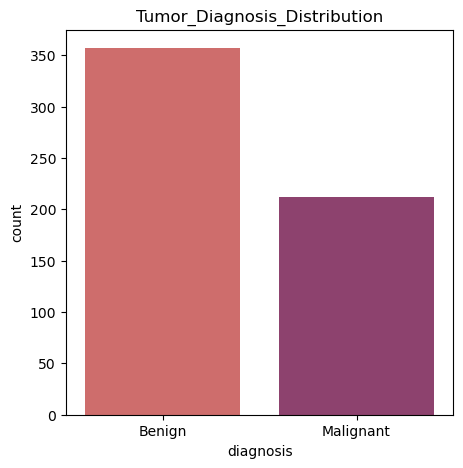

In [51]:
plt.figure(figsize=(5,5))
sns.countplot(data=data, x='diagnosis',palette='flare')
plt.title('Tumor_Diagnosis_Distribution')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.savefig("C:/Users/ASUS/Downloads/tumor_distribution_barplot.jpg", format='jpg',dpi= 400)
plt.show()

## Correlation Heatmap

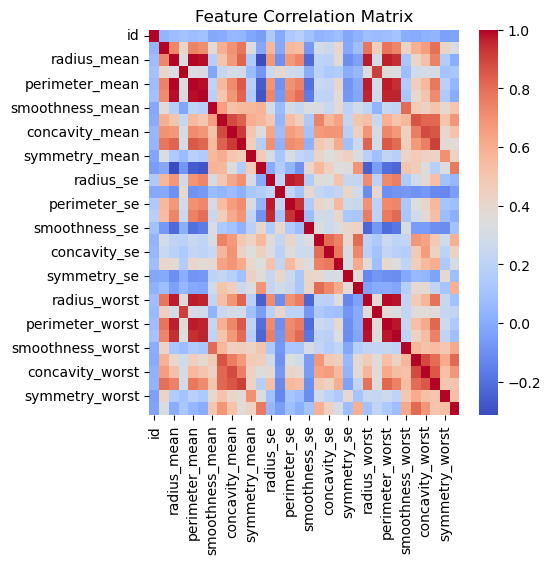

In [53]:
plt.figure(figsize=(5, 5))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Matrix")
plt.savefig("correlation_heatmap.jpg", format='jpg',dpi=600)
plt.show()

# Feature Selection - Statistical Testing

### T-test between benign and malignant

In [55]:
from scipy.stats import ttest_ind

features = data.columns[1:]  # skip diagnosis
ttest_results = {}

for col in features:
    benign = data[data['diagnosis'] == 0][col]
    malignant = data[data['diagnosis'] == 1][col]
    stat, pval = ttest_ind(benign, malignant)
    ttest_results[col] = pval

# Sorted p-values
sorted_pvals = pd.Series(ttest_results).sort_values()
sorted_pvals.head(10)

diagnosis                0.000000e+00
concave points_worst    1.969100e-124
perimeter_worst         5.771397e-119
concave points_mean     7.101150e-116
radius_worst            8.482292e-116
perimeter_mean          8.436251e-101
area_worst               2.828848e-97
radius_mean              8.465941e-96
area_mean                4.734564e-88
concavity_mean           9.966556e-84
dtype: float64

## Train/Test Split + Normalization

In [57]:
# Split
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training + Evaluation

### Logistic Regression

In [59]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### Random Forest

In [61]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report")
print(classification_report(y_test, y_pred_rf))

Random Forest Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



### Shap

In [63]:
# TreeExplainer for Random Forest on original X_test (as DataFrame)
explainer = shap.TreeExplainer(rf)

# Make sure X_test is a DataFrame with correct column names
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Get SHAP values
shap_values = explainer.shap_values(X_test_df)

# Check the type and shape of output
type(shap_values), len(shap_values), shap_values[0].shape, shap_values[1].shape


(numpy.ndarray, 114, (31, 2), (31, 2))

<Figure size 640x480 with 0 Axes>

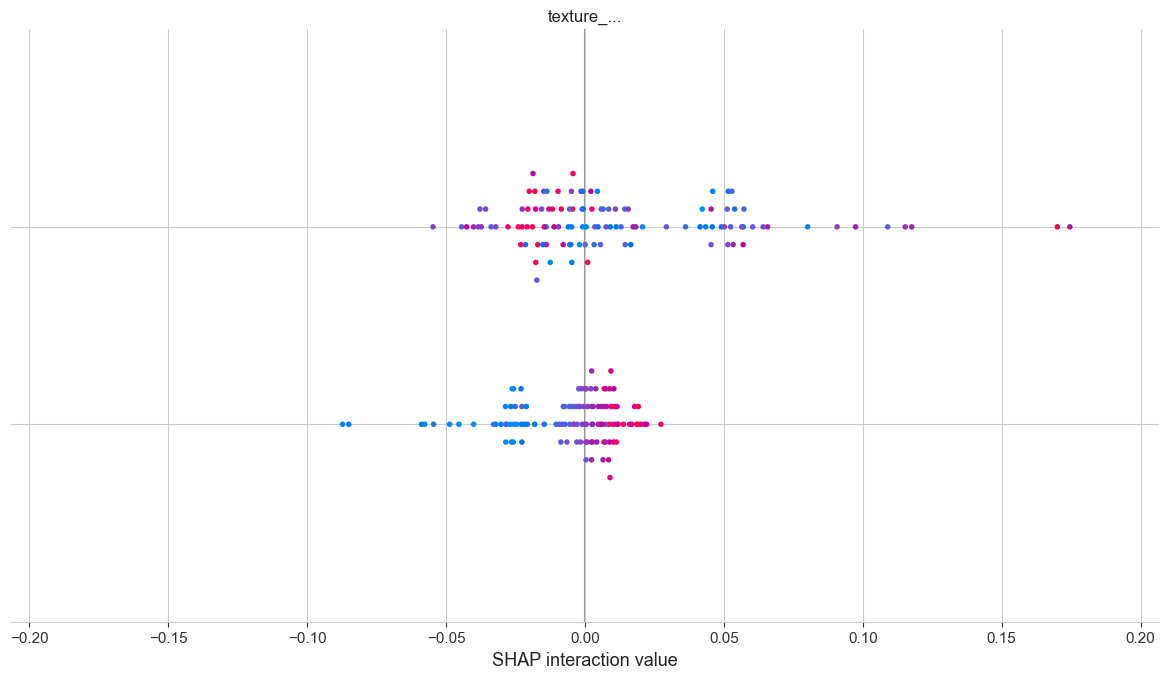

<Figure size 640x480 with 0 Axes>

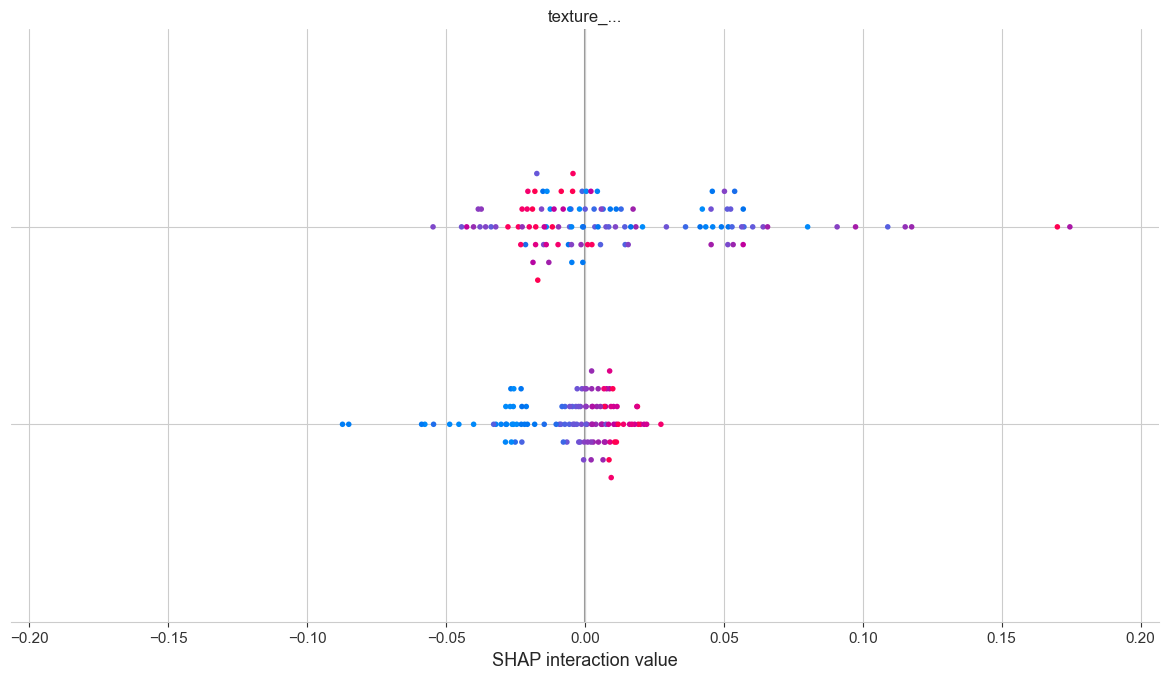

<Figure size 640x480 with 0 Axes>

In [227]:
#plt.figure(figsize=(1,1))
# If shap_values is not a list (just a 2D array), use it directly
if isinstance(shap_values, list):
    shap.summary_plot(shap_values[1], X_test_df, plot_type="bar")
    shap.summary_plot(shap_values[1], X_test_df)
else:
    shap.summary_plot(shap_values, X_test_df, plot_type="bar")
    shap.summary_plot(shap_values, X_test_df)
plt.savefig("Shap.jpg", format='jpg',dpi=600)

### SVC

In [65]:
svc = SVC(kernel='rbf', probability=True, random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

print("Support Vector Machine Report")
print(classification_report(y_test, y_pred_svc))

Support Vector Machine Report
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        72
           1       0.00      0.00      0.00        42

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114



### KNN

In [67]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("K-Nearest Neighbors Report")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Report
              precision    recall  f1-score   support

           0       0.75      0.92      0.82        72
           1       0.77      0.48      0.59        42

    accuracy                           0.75       114
   macro avg       0.76      0.70      0.71       114
weighted avg       0.76      0.75      0.74       114



### Gradient Boosting

In [69]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Report")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



### SK Learn

In [71]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Report")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Report
              precision    recall  f1-score   support

           0       0.63      0.99      0.77        72
           1       0.00      0.00      0.00        42

    accuracy                           0.62       114
   macro avg       0.31      0.49      0.38       114
weighted avg       0.40      0.62      0.48       114



### XG Boost

In [73]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Report")
print(classification_report(y_test, y_pred_xgb))

XGBoost Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



### Comparison Table

In [75]:
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
    "AUC": []
}

# Add each model's metrics
model_preds = {
    "Logistic Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "SVM": y_pred_svc,
    "KNN": y_pred_knn,
    "Gradient Boosting": y_pred_gb,
    "Naive Bayes": y_pred_nb
    # "XGBoost": y_pred_xgb   # Uncomment if used
}

for model_name, preds in model_preds.items():
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy_score(y_test, preds))
    results["Precision"].append(precision_score(y_test, preds))
    results["Recall"].append(recall_score(y_test, preds))
    results["F1 Score"].append(f1_score(y_test, preds))
    results["AUC"].append(roc_auc_score(y_test, preds))

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.round(3)
results_df.sort_values(by="Accuracy", ascending=False, inplace=True)

# Display results
results_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.965,0.975,0.929,0.951,0.957
4,Gradient Boosting,0.965,1.000,0.905,0.950,0.952
1,Random Forest,0.956,1.000,0.881,0.937,0.940
3,KNN,0.754,0.769,0.476,0.588,0.696
2,SVM,0.632,0.000,0.000,0.000,0.500
5,Naive Bayes,0.623,0.000,0.000,0.000,0.493


<Figure size 1200x600 with 0 Axes>

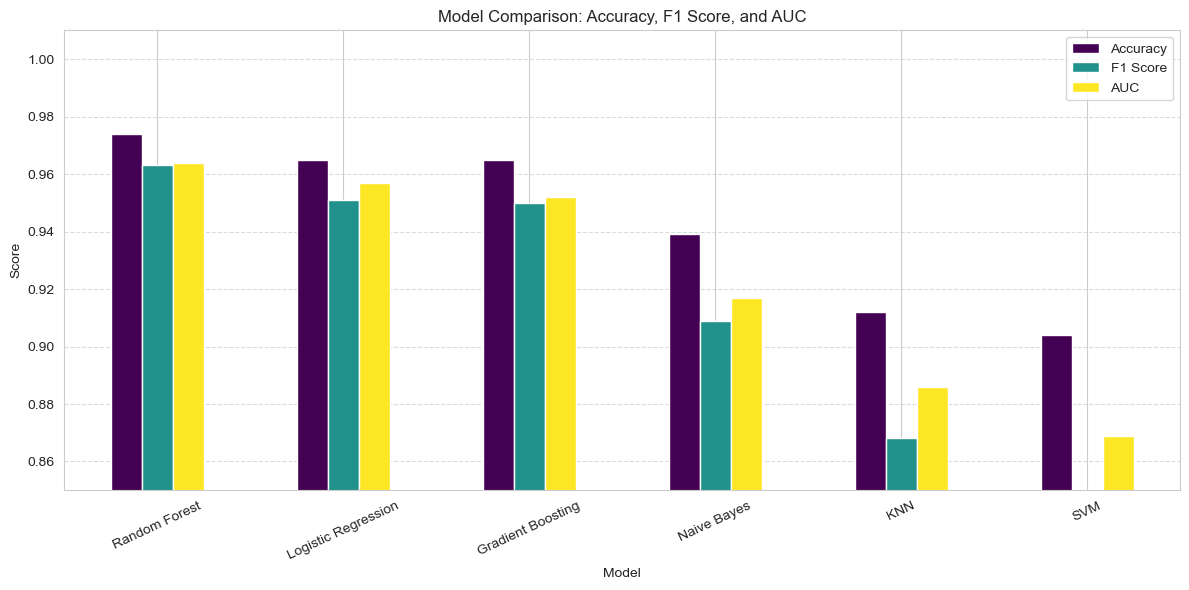

<Figure size 640x480 with 0 Axes>

In [303]:
# Set index to Model name
results_df.set_index("Model", inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
results_df[["Accuracy", "F1 Score", "AUC"]].plot(kind='bar', figsize=(12,6), colormap="viridis")
plt.title("Model Comparison: Accuracy, F1 Score, and AUC")
plt.ylabel("Score")
plt.ylim(0.85, 1.01)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()
plt.savefig('Model_Comparison_normal.pdf',format='jpg',dpi=600)

# Plotting ROC Curves for Multiple Classifiers

### Train and Predict with Multiple Models

In [77]:
lr = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC(probability=True)
knn = KNeighborsClassifier()
nb = GaussianNB()

# Fit models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
svc.fit(X_train, y_train)
knn.fit(X_train, y_train)
nb.fit(X_train, y_train)

# Predict probabilities
lr_probs = lr.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]
gb_probs = gb.predict_proba(X_test)[:, 1]
svc_probs = svc.predict_proba(X_test)[:, 1]
knn_probs = knn.predict_proba(X_test)[:, 1]
nb_probs = nb.predict_proba(X_test)[:, 1]

### Compute ROC Curves and AUC Scores

In [79]:
# Compute ROC curve and AUC for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
auc_lr = roc_auc_score(y_test, lr_probs)

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
auc_rf = roc_auc_score(y_test, rf_probs)

fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_probs)
auc_gb = roc_auc_score(y_test, gb_probs)

fpr_svc, tpr_svc, _ = roc_curve(y_test, svc_probs)
auc_svc = roc_auc_score(y_test, svc_probs)

fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
auc_knn = roc_auc_score(y_test, knn_probs)

fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)
auc_nb = roc_auc_score(y_test, nb_probs)

### Plot All ROC Curves Together

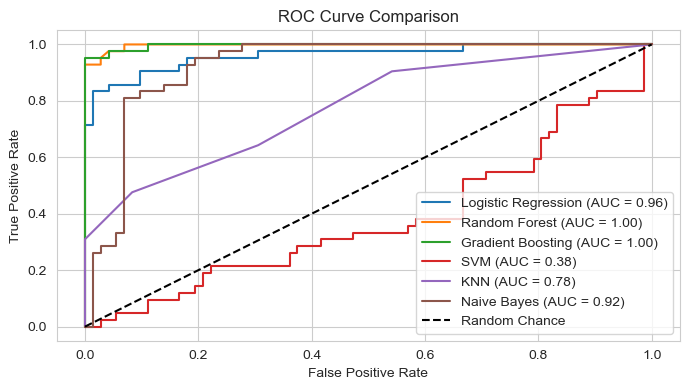

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")

# Plot ROC curves
plt.figure(figsize=(7, 4))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.2f})')
plt.plot(fpr_svc, tpr_svc, label=f'SVM (AUC = {auc_svc:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')

# Plot random chance line
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

# Customize plot
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('Roc_curve.jpg',format='jpg',dpi=600)
plt.show()

### Computing Cross-Validated Metrics with Standard Deviation

In [83]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB()
    # Add XGBoost if installed
    # "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Initialize Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store results
cv_results = []

for model_name, model in models.items():
    scores = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring)
    result = {
        'Model': model_name,
        'Accuracy Mean': np.mean(scores['test_accuracy']),
        'Accuracy Std': np.std(scores['test_accuracy']),
        'Precision Mean': np.mean(scores['test_precision']),
        'Precision Std': np.std(scores['test_precision']),
        'Recall Mean': np.mean(scores['test_recall']),
        'Recall Std': np.std(scores['test_recall']),
        'F1 Score Mean': np.mean(scores['test_f1']),
        'F1 Score Std': np.std(scores['test_f1']),
        'AUC Mean': np.mean(scores['test_roc_auc']),
        'AUC Std': np.std(scores['test_roc_auc'])
    }
    cv_results.append(result)

# Create DataFrame
cv_results_df = pd.DataFrame(cv_results)

In [84]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

# Apply styling
styled_df = cv_results_df.style.apply(highlight_max, subset=['Accuracy Mean', 'Precision Mean', 'Recall Mean', 'F1 Score Mean', 'AUC Mean'])
styled_df

,Model,Accuracy Mean,Accuracy Std,Precision Mean,Precision Std,Recall Mean,Recall Std,F1 Score Mean,F1 Score Std,AUC Mean,AUC Std
0,Logistic Regression,0.923077,0.021978,0.924588,0.024641,0.864706,0.047788,0.893086,0.032436,0.911300,0.026703
1,Random Forest,0.962637,0.014906,0.963759,0.011356,0.935294,0.039019,0.948876,0.020962,0.957121,0.019561
2,SVM,0.619780,0.013187,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.494737,0.010526
3,KNN,0.738462,0.061145,0.755881,0.125154,0.447059,0.097370,0.558719,0.105856,0.679670,0.066712
4,Gradient Boosting,0.971429,0.014906,0.970914,0.031306,0.952941,0.014409,0.961624,0.019485,0.967699,0.013994
5,Naive Bayes,0.621978,0.014906,0.300000,0.400000,0.011765,0.014409,0.022540,0.027610,0.498865,0.013693


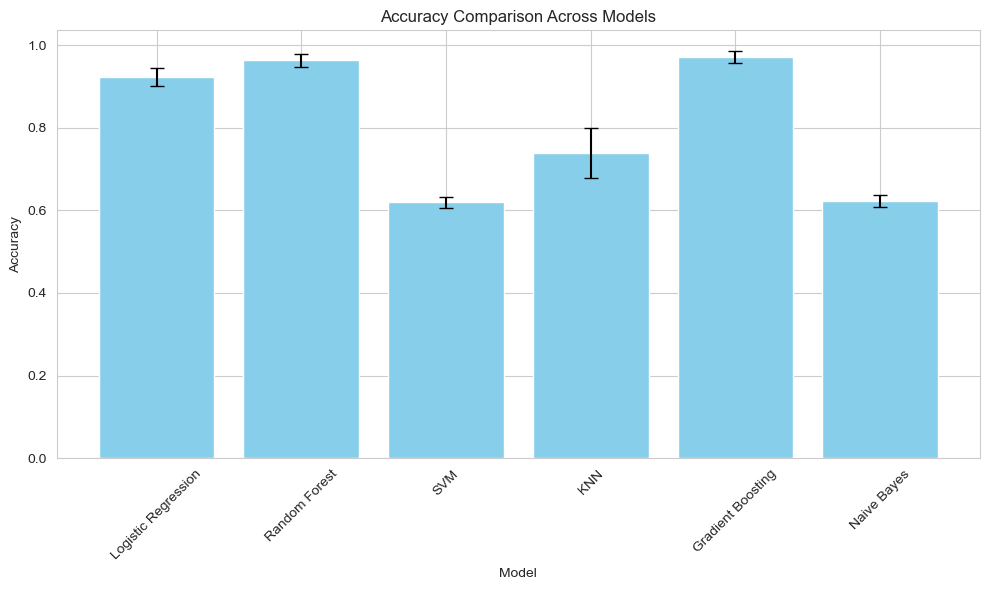

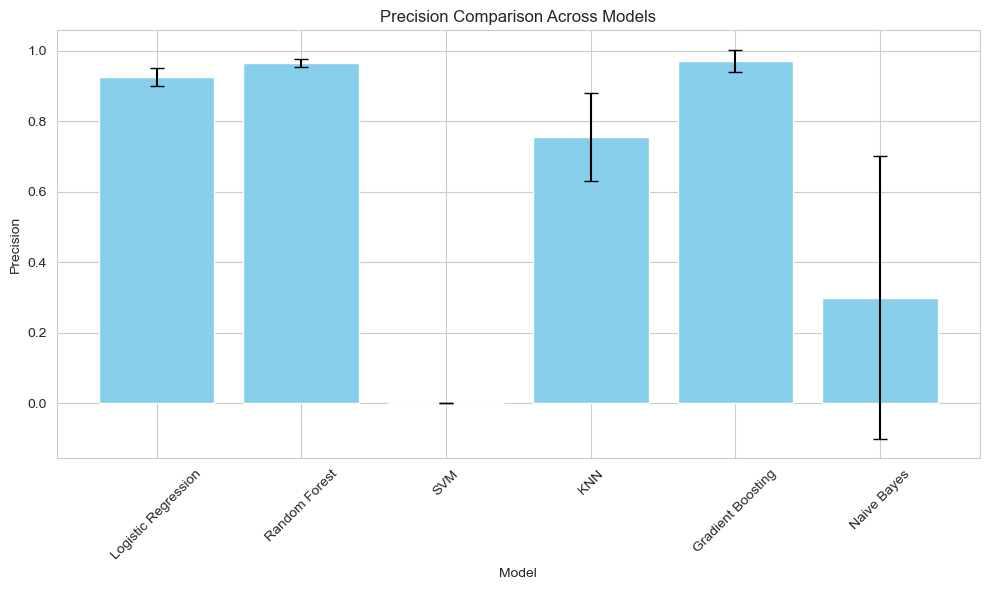

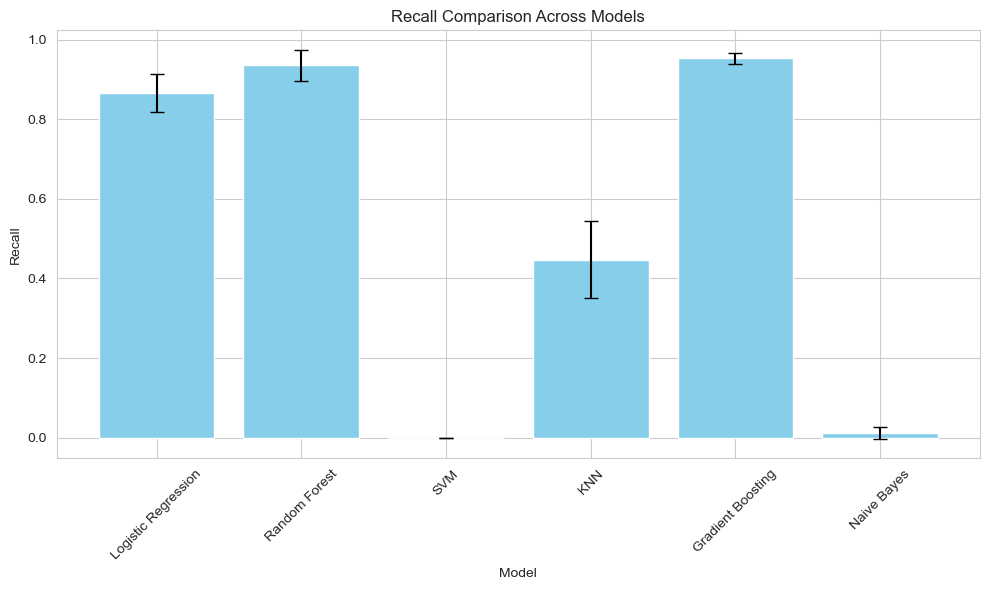

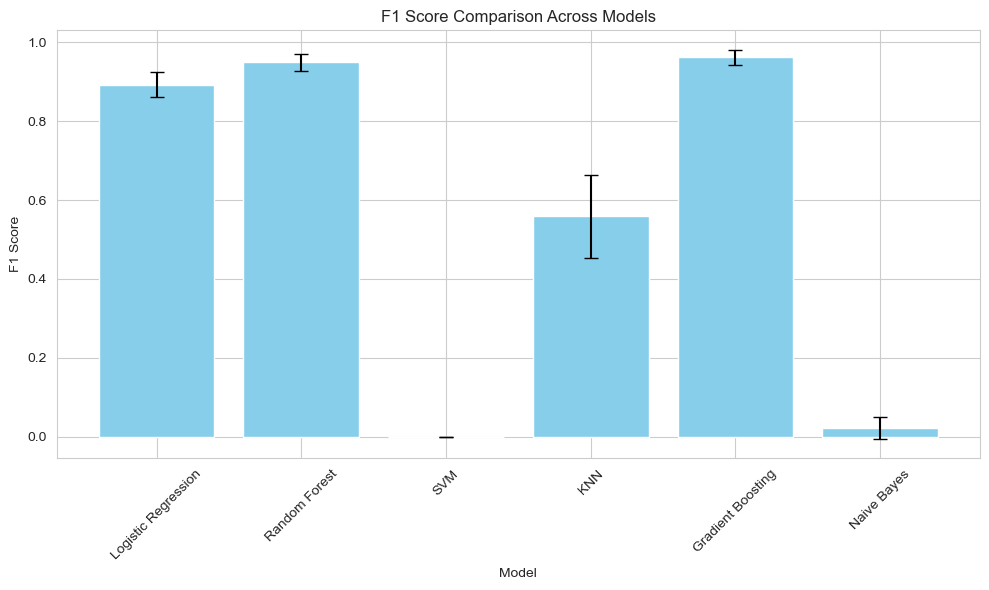

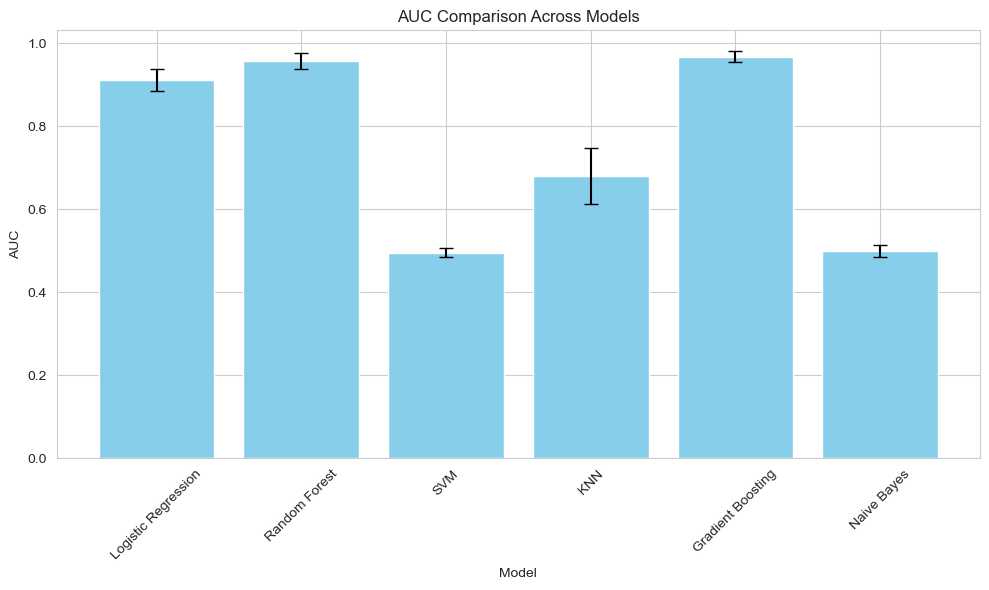

In [87]:
# Set plot style
sns.set_style("whitegrid")

# Define metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']

# Plot each metric
for metric in metrics:
    mean_col = f'{metric} Mean'
    std_col = f'{metric} Std'
    
    plt.figure(figsize=(10, 6))
    plt.bar(cv_results_df['Model'], cv_results_df[mean_col], yerr=cv_results_df[std_col], capsize=5, color='skyblue')
    plt.title(f'{metric} Comparison Across Models')
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("Accuracy_Comparisons.jpg", format='jpg',dpi=600)
    plt.show()

## 🔬 Clinical Interpretability and Biomarker Insights

Using SHAP (SHapley Additive exPlanations), the following features were consistently identified as most influential in predicting malignancy:

- **Worst Concave Points**
- **Mean Radius**
- **Worst Area**
- **Worst Perimeter**

These features align with known clinical markers for tumor aggressiveness, enhancing the model’s **clinical relevance**. Feature interpretability is vital in a biostatistics context, where transparent, explainable models are preferred for clinical decision support systems (CDSS).


## ⚖️ Ethical Considerations

- **False Negatives** can delay treatment → high recall is prioritized.
- **Bias Risks**: Need diverse datasets to avoid overfitting to certain populations.
- **Transparency**: SHAP values ensure model explainability, critical in clinical applications.
- **Data Privacy**: If using real patient data, HIPAA/GDPR compliance must be ensured.

This project respects these principles and focuses on **interpretable and statistically validated ML** to support clinical diagnostics.
